In [77]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt



In [78]:
epl = pd.read_csv("Project_13803342/dataframed_cleaned/epl_data_matches_copy.csv")

In [79]:
# Creating lists of different features

all_both = ["xga","xg","sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y","poss_x" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y" ,"kp", "1/3" ,"ppa" ,"crspa" ,"prog", "sca_x", "passlive_x" ,"to_x" ,"sca_y" ,"venue_code" ,"opp_code", "hour", "day_code", "referee_code" ,"formation_code", "captain_code", "tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "int_x", "err_x", "tkl_y",  "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "int_y", "err_y"
]
both_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
team_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x"]
opp_shooting = ["sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
both_possession = ["poss_x" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y"]
team_possession = ["poss_x","succ%_x","cpa_x","1/3"]
opp_possession = ["poss_y","succ%_y","cpa_y"]
team_creation = ["sca_x", "passlive_x" ,"to_x"]
both_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x", "tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
team_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x"]
opp_def = ["tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
important = [ "xga", "xg","sot_x", "sot_y", "sh_x", "dist_x", "tkl%_x", "dist_y", "sh_y", "succ%_y", "tkl%_y", "poss_x", "succ%_x", "captain_code", "1/3", "opp_code"]
epl = epl.drop(columns = "target")

f1 = all_both 
f2 = both_shooting
f3 = team_shooting
f4 = opp_shooting 
f5 = both_possession
f6 = team_possession 
f7 = opp_possession 
f8 = team_creation
f9 = both_def 
f10 = team_def 
f11 = opp_def

In [80]:
import pandas as pd


# Defining the columns to normalise
columns_to_normalise = ['xga', 'xg', 'sh_x', 'sot_x', 'dist_x', 'fk_x', 'pk_x', 'pkatt_x', 'sh_y', 'sot_y', 'dist_y', 'fk_y', 'pk_y', 'pkatt_y', 'poss_x', 'poss_y', 'succ%_x', 'cpa_x', 'succ%_y', 'cpa_y', 'kp', '1/3', 'ppa', 'crspa', 'prog', 'sca_x', 'passlive_x', 'to_x', 'sca_y', 'venue_code', 'opp_code', 'hour', 'day_code', 'referee_code', 'formation_code', 'captain_code', 'tkl_x', 'tklw_x', 'def 3rd_x', 'tkl%_x', 'blocks_x','int_x', 'err_x', 'tkl_y', 'tklw_y', 'def 3rd_y', 'tkl%_y', 'blocks_y', 'int_y', 'err_y']

# Creating a Min-max normalisation function
def min_max_normalisation(column):
    return (column - column.min()) / (column.max() - column.min())

# Applying min-max normalisation to selected columns
normalised_data = epl[columns_to_normalise].apply(min_max_normalisation)

# Appending the normalised columns with the original dataframe
epl_normalised = pd.concat([epl.drop(columns=columns_to_normalise), normalised_data], axis=1)

# Displaying the dataframe with the normalised columns 
epl_normalised

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,blocks_x,int_x,err_x,tkl_y,tklw_y,def 3rd_y,tkl%_y,blocks_y,int_y,err_y
0,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,0.266667,0.322581,0.25,0.424242,0.545455,0.44,0.583,0.387097,0.161290,0.2
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,0.333333,0.290323,0.25,0.303030,0.272727,0.24,0.500,0.161290,0.161290,0.0
2,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,0.300000,0.064516,0.00,0.272727,0.500000,0.28,0.357,0.354839,0.161290,0.0
3,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,0.766667,0.290323,0.00,0.212121,0.318182,0.28,0.600,0.419355,0.419355,0.0
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,0.266667,0.322581,0.25,0.333333,0.500000,0.32,0.333,0.354839,0.193548,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2018-09-22,15:00,Premier League,Matchweek 6,Sat,Away,D,0.0,0.0,Crystal Palace,...,0.366667,0.387097,0.25,0.575758,0.636364,0.48,0.294,0.419355,0.354839,0.2
2619,2018-09-29,15:00,Premier League,Matchweek 7,Sat,Home,L,0.0,2.0,Leicester City,...,0.366667,0.258065,0.00,0.575758,0.590909,0.28,0.353,0.387097,0.419355,0.0
2620,2018-10-06,17:30,Premier League,Matchweek 8,Sat,Away,L,2.0,3.0,Manchester Utd,...,0.066667,0.129032,0.00,0.363636,0.272727,0.28,0.375,0.193548,0.483871,0.4
2621,2018-10-20,15:00,Premier League,Matchweek 9,Sat,Home,L,0.0,1.0,Brighton,...,0.200000,0.451613,0.00,0.727273,0.863636,0.40,0.429,0.129032,0.483871,0.2


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# list of the different features
features = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]

x = epl.drop('result', axis=1)  # Features
y = epl['result']  # Target variable

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialising an empty dictionary to store results
results = {}

# Looping through each feature and testing out the model
for i, feature in enumerate(features, 1):
    # Select the current feature
    x_train_current = x_train[feature]
    x_test_current = x_test[feature]
    
    # Creating a Gaussian Naive Bayes model
    model = GaussianNB()
    
    # Training the model on the training data
    model.fit(x_train_current, y_train)
    
    # Evaluating the model's performance on the testing data
    y_pred = model.predict(x_test_current)
    accuracy1 = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing the results in the dictionary
    results[f'f{i}'] = {'accuracy': accuracy1, 'classification_report': report}

# Printing out the results
print("Feature with the highest accuracy:")
max_accuracy_feature = max(results, key=lambda x: results[x]['accuracy'])
print(max_accuracy_feature)
print("Accuracy:", results[max_accuracy_feature]['accuracy'])

for key, value in results.items():
    print(f"Feature {key}:")
    print(f"Accuracy: {value['accuracy']}")
    print("Classification Report:")
    report_df = pd.DataFrame(value['classification_report']).transpose()
    print(report_df)

Feature with the highest accuracy:
f2
Accuracy: 0.6010165184243964
Feature f1:
Accuracy: 0.5946632782719187
Classification Report:
              precision    recall  f1-score     support
D              0.376147  0.222826  0.279863  184.000000
L              0.632787  0.672474  0.652027  287.000000
W              0.627346  0.740506  0.679245  316.000000
accuracy       0.594663  0.594663  0.594663    0.594663
macro avg      0.545427  0.545269  0.537045  787.000000
weighted avg   0.570600  0.594663  0.575944  787.000000
Feature f2:
Accuracy: 0.6010165184243964
Classification Report:
              precision    recall  f1-score     support
D              0.446809  0.114130  0.181818  184.000000
L              0.636364  0.682927  0.658824  287.000000
W              0.592593  0.810127  0.684492  316.000000
accuracy       0.601017  0.601017  0.601017    0.601017
macro avg      0.558588  0.535728  0.508378  787.000000
weighted avg   0.574471  0.601017  0.557607  787.000000
Feature f3:
Accuracy:

In [82]:
# Printing out the results
print("Feature with the highest accuracy:")
max_accuracy_feature = max(results, key=lambda x: results[x]['accuracy'])
print(max_accuracy_feature)
print("Accuracy:", results[max_accuracy_feature]['accuracy'])

Feature with the highest accuracy:
f2
Accuracy: 0.6010165184243964


In [83]:
# Selecting our feature 
f = f2

In [84]:
#1 70/30
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Splitting data into features (x) and target (y)
x = epl[f] 
y = epl["result"]

# Defining the values we want our CV to check
param_grid = {}

# Initialise the KNN classifier
nb = GaussianNB()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Initialising GridSearchCV with  the KNN classifier
grid_search = GridSearchCV(nb,cv=10,param_grid=param_grid,scoring='accuracy')

# Fitting the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Returning the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Returning the best model
best_model = grid_search.best_estimator_

# Results
cv_results1 = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results1)
print("Mean Accuracy:", cv_results1.mean())

Best Hyperparameters: {}
Cross-Validation Results:
[0.58152174 0.57608696 0.5326087  0.56521739 0.59782609 0.52717391
 0.59016393 0.59562842 0.54644809 0.59562842]
Mean Accuracy: 0.5708303635067711


In [85]:
#2 normalised
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Splitting data into features (x) and target (y)
x = epl_normalised[f] 
y = epl_normalised["result"]

# Defining the values we want our CV to check
param_grid = {}

# Initialise the KNN classifier
nb = GaussianNB()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Initialising GridSearchCV with  the KNN classifier
grid_search = GridSearchCV(nb,cv=10,param_grid=param_grid,scoring='accuracy')

# Fitting the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Returning the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Returning the best model
best_model = grid_search.best_estimator_

# Results
cv_results_norm = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_norm)
print("Mean Accuracy:", cv_results_norm.mean())

Best Hyperparameters: {}
Cross-Validation Results:
[0.58152174 0.57608696 0.5326087  0.56521739 0.59782609 0.52717391
 0.59016393 0.59562842 0.54644809 0.59562842]
Mean Accuracy: 0.5708303635067711


In [86]:
#1 70/30
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Splitting data into features (x) and target (y)
x = epl[f] 
y = epl["result"]

# Defining the values we want our CV to check
param_grid = {}

# Initialise the KNN classifier
nb = GaussianNB()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Initialising GridSearchCV with  the KNN classifier
grid_search = GridSearchCV(nb,cv=10,param_grid=param_grid,scoring='accuracy')

# Fitting the GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Returning the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Returning the best model
best_model = grid_search.best_estimator_

# Results
cv_results_smote = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote)
print("Mean Accuracy:", cv_results_smote.mean())

Best Hyperparameters: {}
Cross-Validation Results:
[0.55357143 0.53125    0.51339286 0.52678571 0.54017857 0.47321429
 0.52232143 0.56696429 0.53363229 0.52017937]
Mean Accuracy: 0.5281490230621396


In [87]:
#1 70/30
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Splitting data into features (x) and target (y)
x = epl_normalised[f] 
y = epl_normalised["result"]

# Defining the values we want our CV to check
param_grid = {}

# Initialise the KNN classifier
nb = GaussianNB()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Initialising GridSearchCV with  the KNN classifier
grid_search = GridSearchCV(nb,cv=10,param_grid=param_grid,scoring='accuracy')

# Fitting the GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Returning the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Returning the best model
best_model = grid_search.best_estimator_

# Results
cv_results_smote_norm = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote_norm)
print("Mean Accuracy:", cv_results_smote_norm.mean())

Best Hyperparameters: {}
Cross-Validation Results:
[0.52232143 0.52232143 0.48214286 0.54017857 0.54464286 0.47321429
 0.54017857 0.57589286 0.55156951 0.5470852 ]
Mean Accuracy: 0.5299547565663036


In [88]:
# Returning the results of the Cross-Validation
print("Accuracy of unbalanced dataset: ")
print("Unnormalised", cv_results1.mean())
print("Normalised",cv_results_norm.mean())
print("\nAccuracy of balanced dataset with SMOTE: ")
print("Unnormalised" , cv_results_smote.mean())
print("Normalised",cv_results_smote_norm.mean())

Accuracy of unbalanced dataset: 
Unnormalised 0.5708303635067711
Normalised 0.5708303635067711

Accuracy of balanced dataset with SMOTE: 
Unnormalised 0.5281490230621396
Normalised 0.5299547565663036


In [89]:
# BEST MODEL

# Initialize NB classifier
nb=GaussianNB() 
nb.fit(x_train,y_train)
pred = nb.predict(x_test)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
report = classification_report(y_test,pred)
print(report)
conf_matrix = confusion_matrix(y_test,pred)
print(conf_matrix)


0.6010165184243964
              precision    recall  f1-score   support

           D       0.45      0.11      0.18       184
           L       0.64      0.68      0.66       287
           W       0.59      0.81      0.68       316

    accuracy                           0.60       787
   macro avg       0.56      0.54      0.51       787
weighted avg       0.57      0.60      0.56       787

[[ 21  66  97]
 [ 12 196  79]
 [ 14  46 256]]


Some of the code from the heatmap below was extracted from kaggle.
- sns heatmaps

'https://www.kaggle.com/code/alkanerturan/stroke-prediction-smote-gridsearch-model-comp'

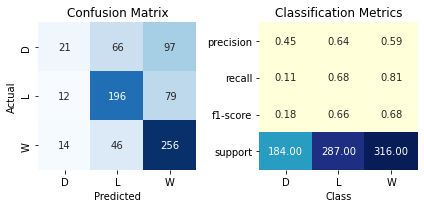

0.558588246531509 : is the precision score
0.5357279487764608 : is the recall score
0.5083778966131908 : is the f1 score
Highest accuracy score for Naives Bay: 
60.1


In [90]:

import seaborn as sns
class_names = ["D", "L","W"]
report = classification_report(y_test, pred, target_names=class_names, output_dict=True)

# Setting up plot size and style
plt.figure(figsize=(6, 3))

# Plotting confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True,cbar=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting classification report heatmap
plt.subplot(1, 2, 2)
sns.heatmap(np.array([[report[label][metric] for label in class_names] for metric in report[class_names[0]]]),
            annot=True, cbar=False,fmt=".2f", cmap="YlGnBu", xticklabels=class_names, yticklabels=report[class_names[0]].keys())

plt.xticks(rotation=0)
plt.yticks(rotation=0)
#plt.ylabel("Metrics")
plt.xlabel("Class")
plt.title("Classification Metrics")

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

print(precision_score(y_test, pred, average='macro'), ": is the precision score")
print(recall_score(y_test, pred, average='macro'), ": is the recall score")
print(f1_score(y_test, pred, average='macro'), ": is the f1 score")

best = accuracy * 100
print("Highest accuracy score for Naives Bay: ")
print(round(best,2))
